In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
BostonTrain = pd.read_csv("C:\datasets\Train.csv")
BostonTrain.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


<Axes: xlabel='rm', ylabel='medv'>

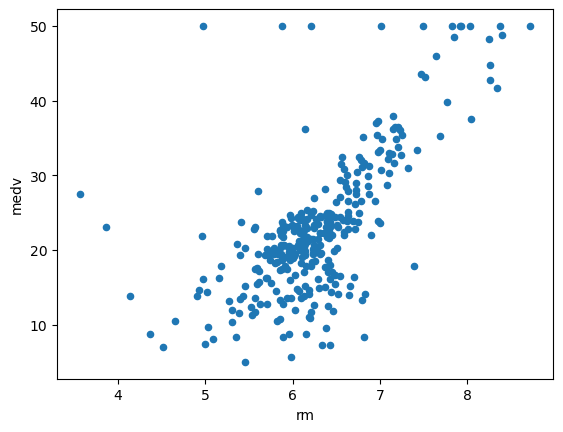

In [3]:
BostonTrain.drop('ID',axis=1,inplace=True)
BostonTrain.plot.scatter('rm','medv')

<Axes: >

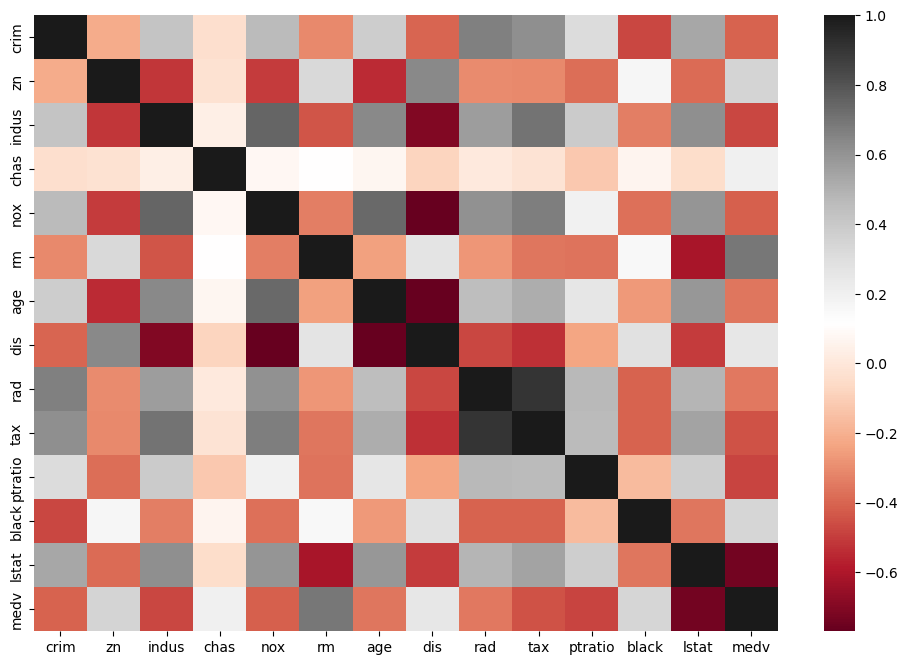

In [4]:
plt.subplots(figsize=(12,8))
sns.heatmap(BostonTrain.corr(), cmap = 'RdGy')

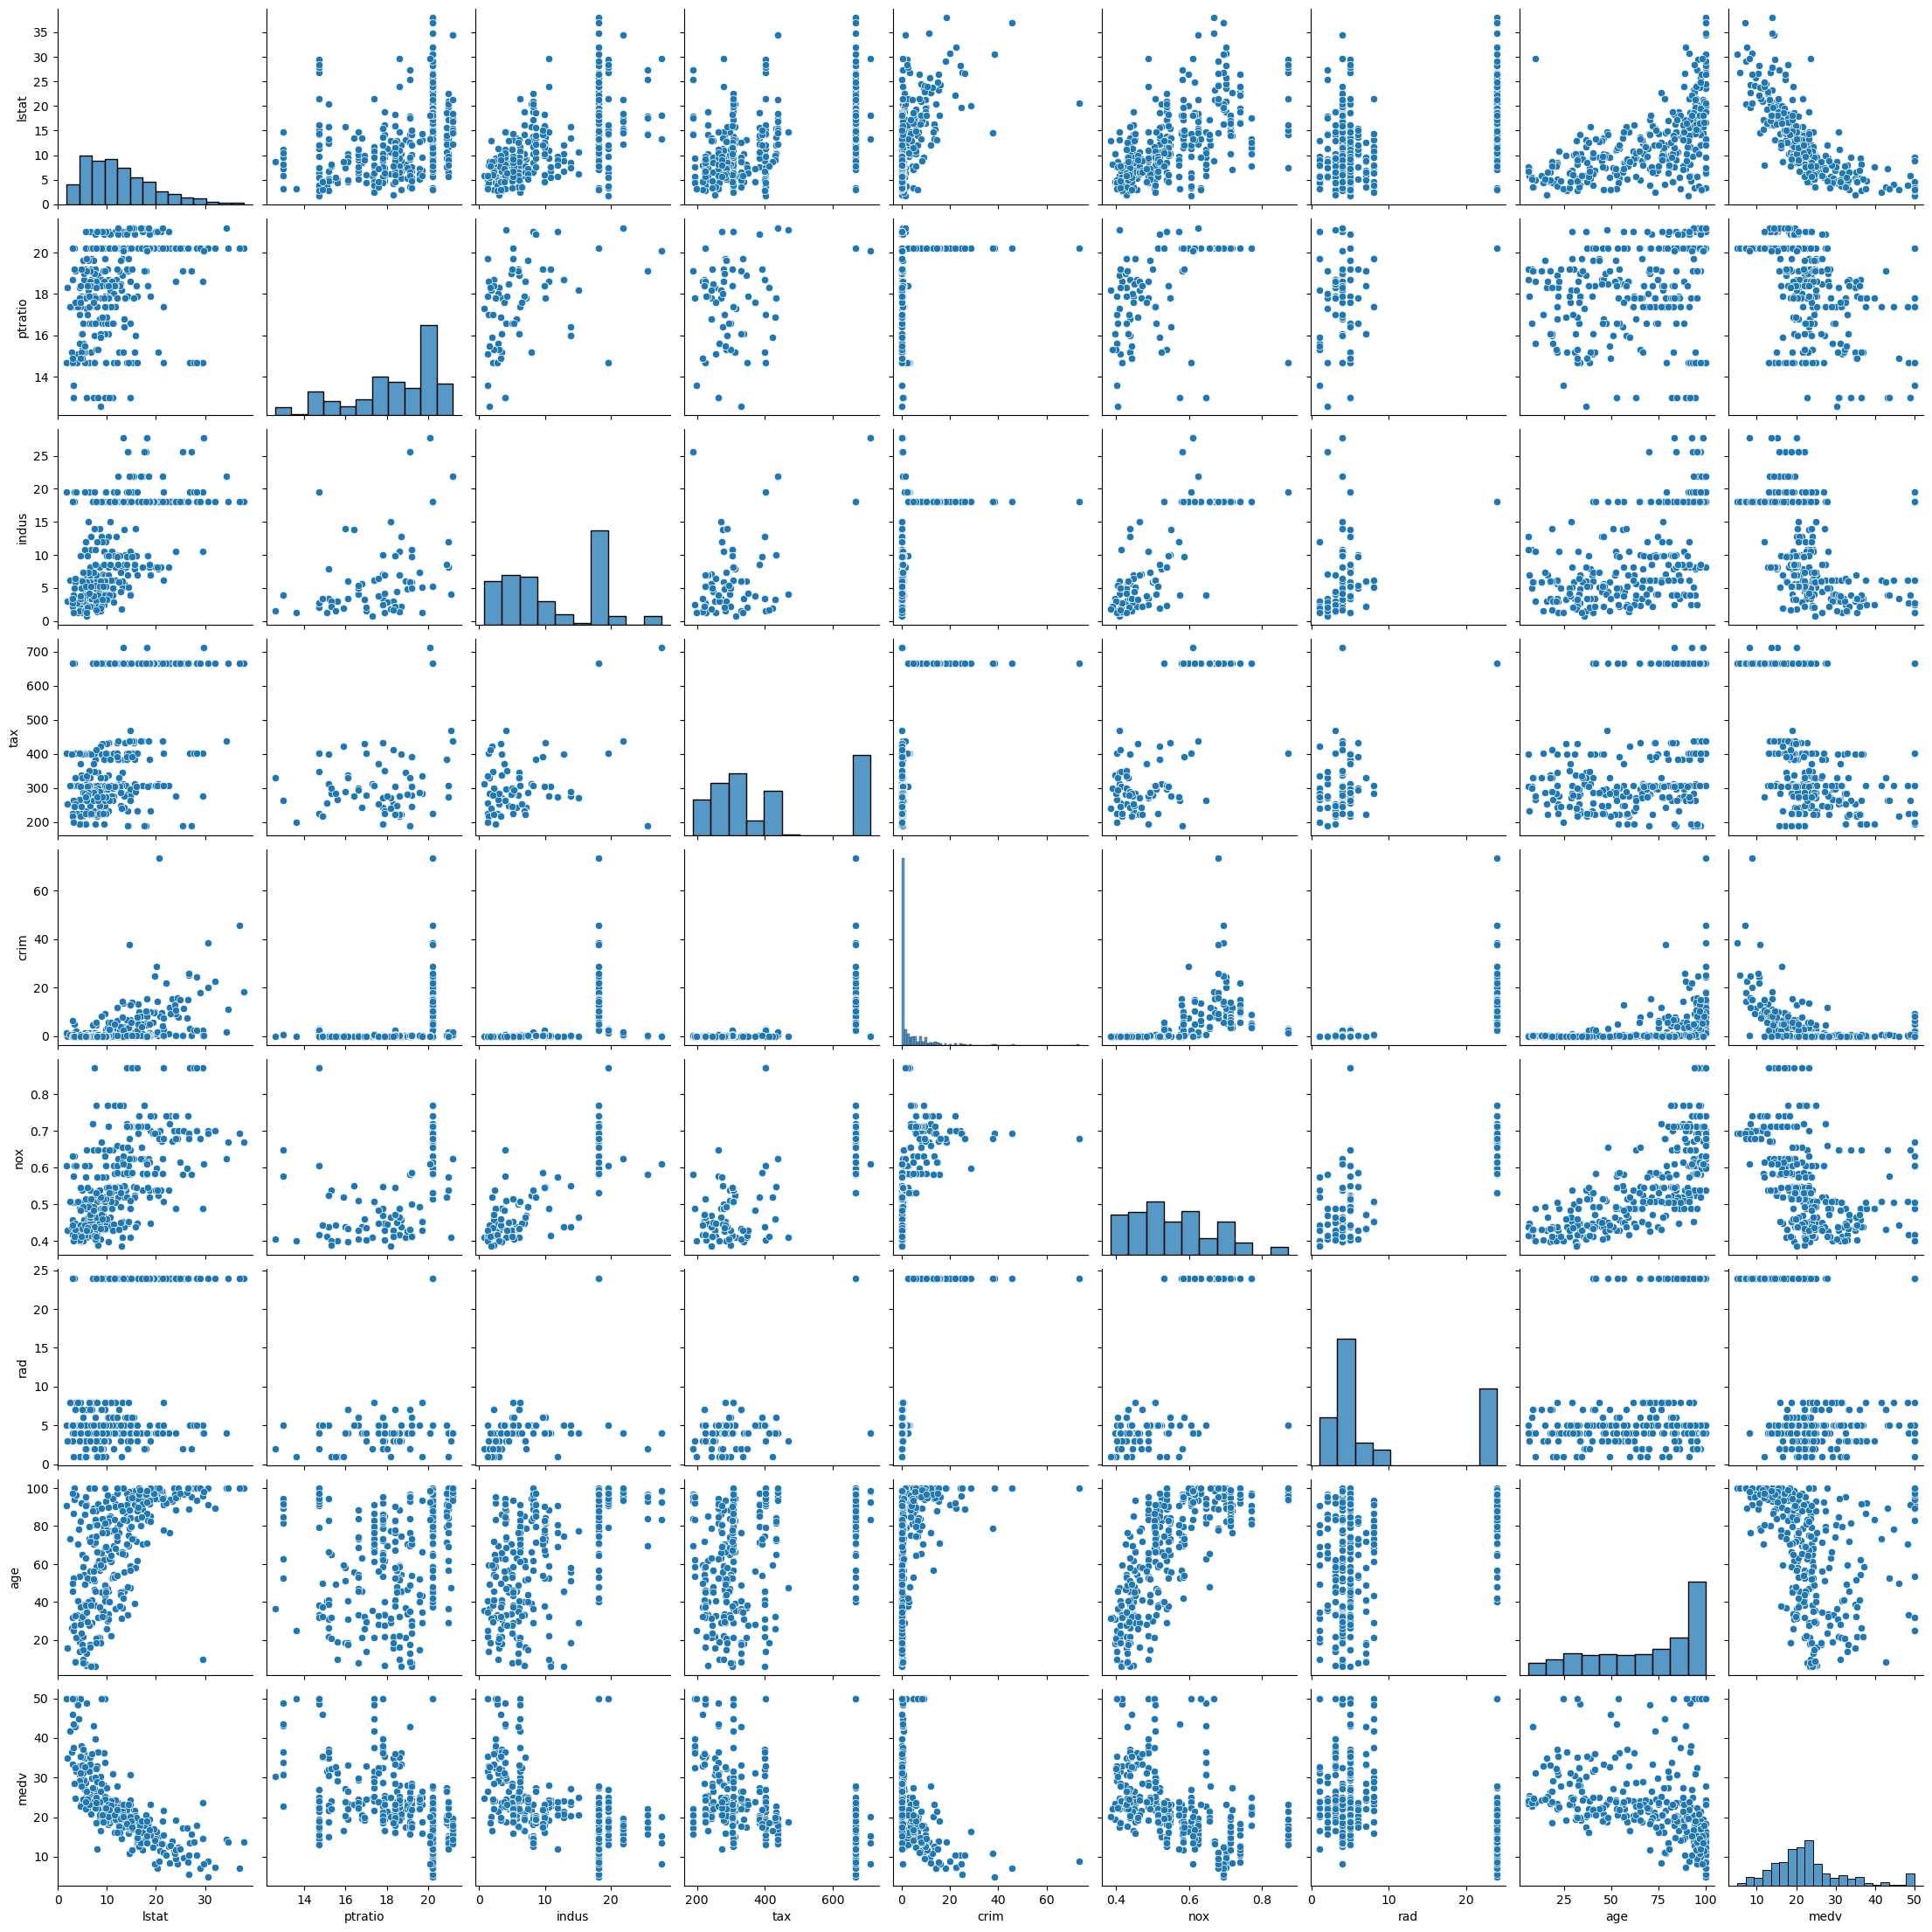

In [5]:
sns.pairplot(BostonTrain, vars = ['lstat', 'ptratio', 'indus', 'tax', 'crim','nox','rad','age','medv'])

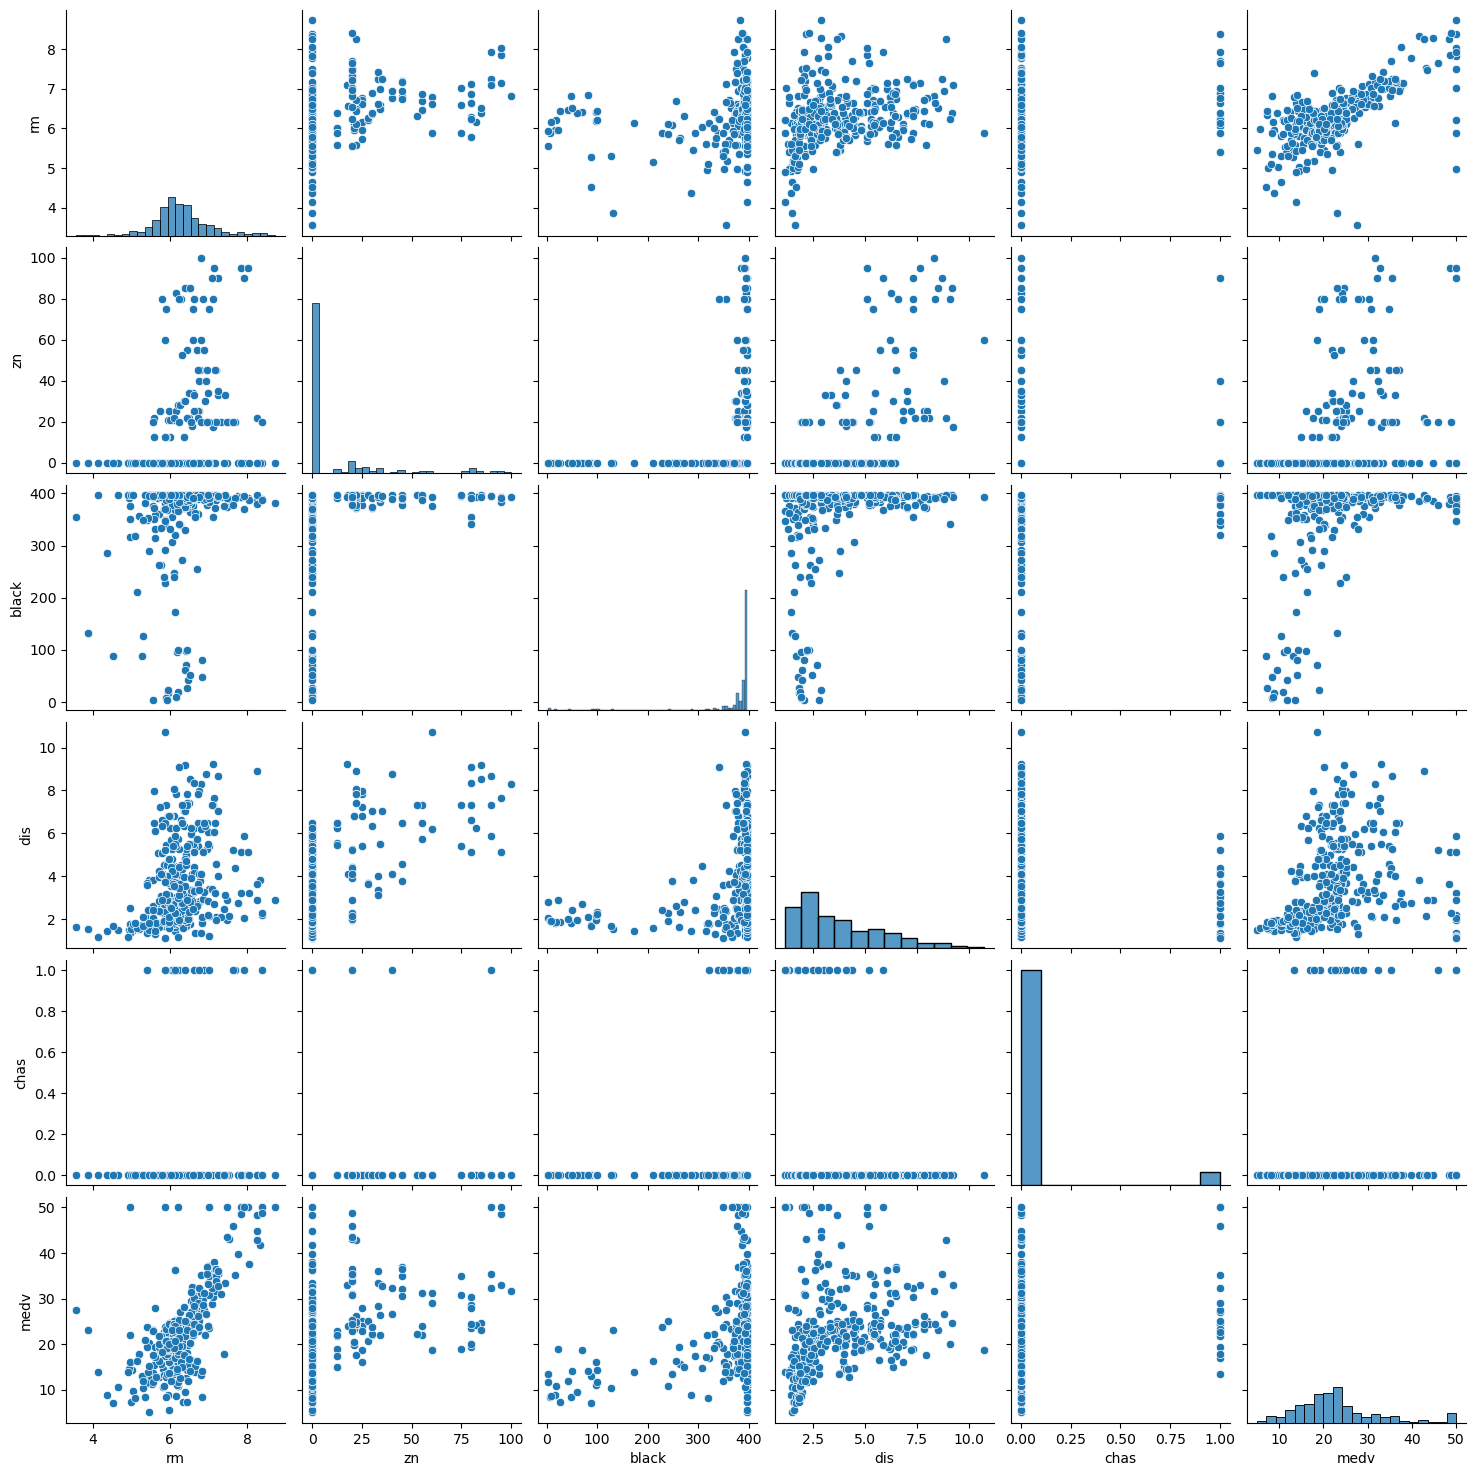

In [6]:
sns.pairplot(BostonTrain, vars = ['rm', 'zn', 'black', 'dis', 'chas','medv'])

In [7]:
X = BostonTrain[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]
y=BostonTrain['medv']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [10]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [11]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

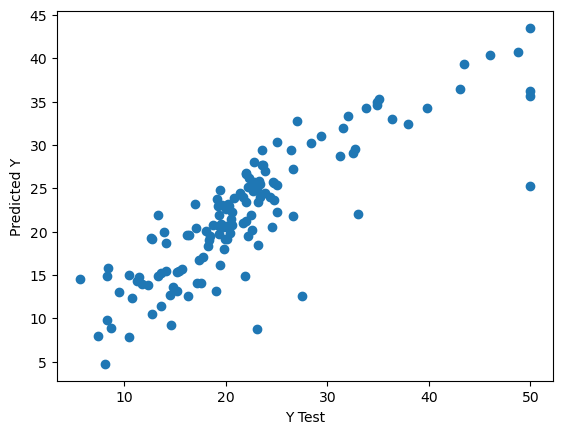

In [12]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [13]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 3.355625138153782
MSE: 23.21143938554698
RMSE: 4.817825171749903


C:\Users\Admin\AppData\Local\Temp\ipykernel_116\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


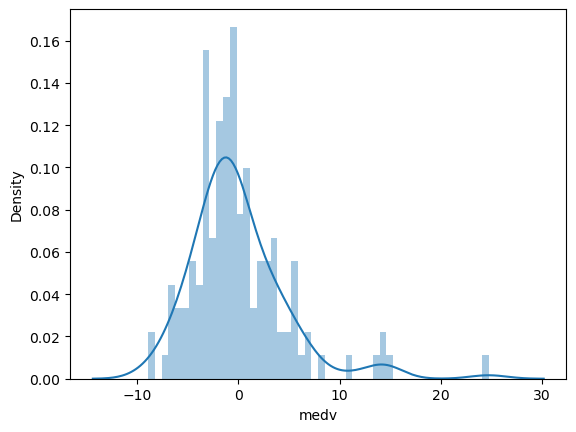

In [14]:
sns.distplot((y_test-predictions),bins=50);

In [15]:
coefficients=pd.DataFrame(lm.coef_,X.columns)
coefficients.columns= ['coefficients']
coefficients

,coefficients
crim,-0.027804
zn,0.047104
indus,0.114969
chas,3.159050
nox,-15.509253
rm,4.569913
age,-0.035556
dis,-1.641740
rad,0.277468
tax,-0.011825
